# Uber Customer Data Analysis

### Import the libraries

In [2]:
%pylab inline
import pandas as pd
import numpy as np
import seaborn

Populating the interactive namespace from numpy and matplotlib


In [6]:
# load the data
data = pd.read_csv('uber-raw-data-apr14.csv')
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


### Convert datetime and add some useful columns

In [7]:
# convert to datetime format
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

In [8]:
# add 'day of month' column
data['Day of Month'] = data['Date/Time'].dt.day
data

,Date/Time,Lat,Lon,Base,Day of Month
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1
...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30


In [9]:
# add 'weekday' column
data['Weekday'] = data['Date/Time'].dt.weekday

In [10]:
# add 'hour' column
data['Hour'] = data['Date/Time'].dt.hour

In [11]:
# check the last five rows of data
data.tail()

,Date/Time,Lat,Lon,Base,Day of Month,Weekday,Hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


### Analysis

#### Analyze the day of month

In [12]:
# calculate how many users per day or month
Day_of_Month = data.groupby('Day of Month')['Date/Time'].count()
Day_of_Month

Day of Month
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
Name: Date/Time, dtype: int64

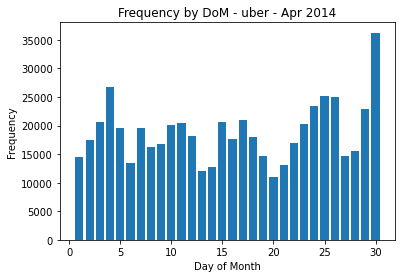

In [13]:
# make a plot

dom = [dom for dom, df in data.groupby('Day of Month')]

plt.bar(dom, Day_of_Month)
#plt.xticks(dom)
plt.ylabel('Frequency')
plt.xlabel('Day of Month')
title('Frequency by DoM - uber - Apr 2014')
plt.show()

Text(0.5, 1.0, 'Frequency by DoM - uber - Apr 2014')

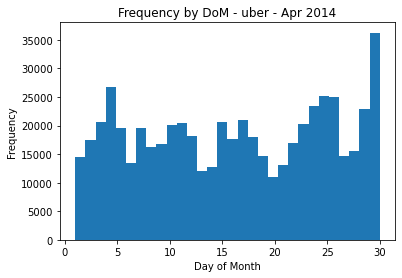

In [14]:
# make a plot in another way

hist(data['Day of Month'], bins = 30)
plt.ylabel('Frequency')
plt.xlabel('Day of Month')
title('Frequency by DoM - uber - Apr 2014')

<BarContainer object of 30 artists>

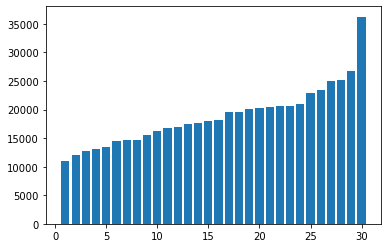

In [16]:
by_day_sorted = Day_of_Month.sort_values()
bar(range(1,31), by_day_sorted)

### Analyze the hour

(array([ 7769.,  4935.,  5040.,  6095.,  9476., 18498., 24924., 22843.,
        17939., 17865., 18774., 19425., 22603., 27190., 35324., 42003.,
        45475., 43003., 38923., 36244., 36964., 30645., 20649.,     0.]),
 array([ 0.5       ,  1.47916667,  2.45833333,  3.4375    ,  4.41666667,
         5.39583333,  6.375     ,  7.35416667,  8.33333333,  9.3125    ,
        10.29166667, 11.27083333, 12.25      , 13.22916667, 14.20833333,
        15.1875    , 16.16666667, 17.14583333, 18.125     , 19.10416667,
        20.08333333, 21.0625    , 22.04166667, 23.02083333, 24.        ]),
 <a list of 24 Patch objects>)

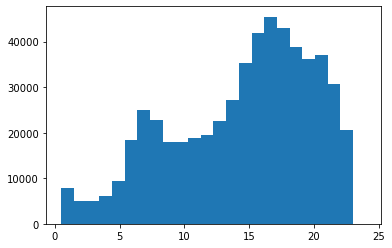

In [17]:
hist(data['Hour'], bins=24, range=(.5, 24))

### Analyze the weekday

([<matplotlib.axis.XTick at 0x23ad933fd08>,
 [Text(0, 0, 'Mon'),
  Text(0, 0, 'Tue'),
  Text(0, 0, 'Wed'),
  Text(0, 0, 'Thu'),
  Text(0, 0, 'Fri'),
  Text(0, 0, 'Sat'),
  Text(0, 0, 'Sun')])

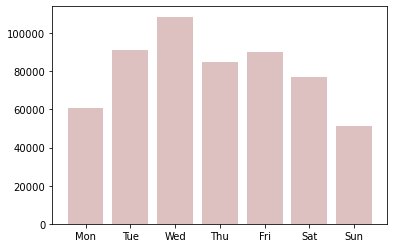

In [18]:
hist(data['Weekday'], bins=7, range =(-.5,6.5), rwidth=.8, color='#AA6666', alpha=.4)
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())

### Cross Analysis (hour, dow)

In [19]:
week_hour = data.groupby(['Weekday', 'Hour'])['Date/Time'].count()
week_hour

Weekday  Hour
0        0        518
         1        261
         2        238
         3        571
         4       1021
                 ... 
6        19      2579
         20      2276
         21      2310
         22      1639
         23      1018
Name: Date/Time, Length: 168, dtype: int64

In [20]:
week_hour = week_hour.unstack()
week_hour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Weekday,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


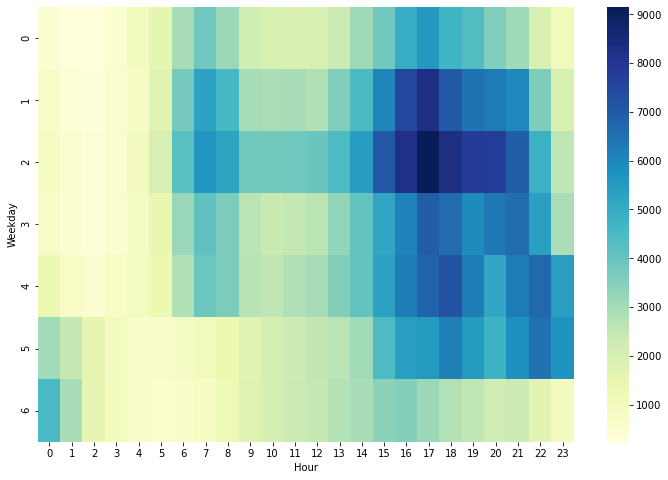

In [21]:
figure(figsize=(12, 8))
seaborn.heatmap(week_hour, cmap="YlGnBu")

From the above plot, we can see that many people will take Uber during 4pm-7pm each day.